# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N$ particles (file: <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration (file: <font face="Courier">config.final</font>). 
1. <span style="color:red">Improve the MD code by enabling (you should insert this option via a boolean-like variable in the input file) the **possibility** to **(re)start** reading not only a **actual** spatial configuration [$\vec{r}(t)$] file but also an **old** spatial configuration [$\vec{r}(t-dt)$] file</span> (files: <font face="Courier">old.0</font> and <font face="Courier">old.final</font>).
2. Moreover, <span style="color:red">add the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature</span>.

The typical required operations when the re-start option will be enabled are:
1. read $\vec{r}(t)$ and $\vec{r}(t-dt)$ from the corresponding input files
2. compute $\vec{r}(t+dt)$ with one step of the Verlet algorithm; with $\vec{r}(t+dt)$ and $\vec{r}(t-dt)$ compute $\vec{v}(t)$; finally obtain the actual temperature $T(t)$
3. by comparing $T(t)$ with the desired/target temperature  $T^\star$ extract a scaling factor for the velocities and rescale them: $\vec{v}(t) \to \vec{v}_s(t)$
4. use $\vec{v}_s(t)$ to estimate a novel **old** spatial configuration: $\vec{r}_{new}(t-dt) = \vec{r}(t+dt) - 2 dt \vec{v}_s$
5. use $\vec{r}_{new}(t-dt)$ and $\vec{r}(t)$ to start the simulation

This will help you, especially in the equilibration phases of your simulations.

### Exercise 04.2

The Molecular Dynamics code we have provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.
Take the MD code and include block averaging: 

Divide the <span style="color:blue"><font face="Courier">nstep</font></span> of the simulation into <span style="color:blue"><font face="Courier">nblocks</font></span>. By exploiting these blocks, <span style="color:red">code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$</span>, that will be written in new specific output files, for example: <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span>

### Exercise 04.3

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code</span>: instantaneous values, average values and uncertainties.

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.4

By means of your upgraded MD code, equilibrate and <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) and Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the pressure $P$ and the temperature, $T$ ... in SI units!

# EXECUTING THE PROGRAM

Everything is set up so that by running the script named "simulate.sh" all three of the simulations start in order, going through their equilibration phase and then performing the simulation itself. All the final output and frame files are conveniently stored in the directory "sim_data", where they are accessed by this notebook.

In [ ]:
# WARNING: This may take a while! #CoffeeTime
!./simulate.sh

In [1]:
import numpy as np
import matplotlib.pyplot as plt

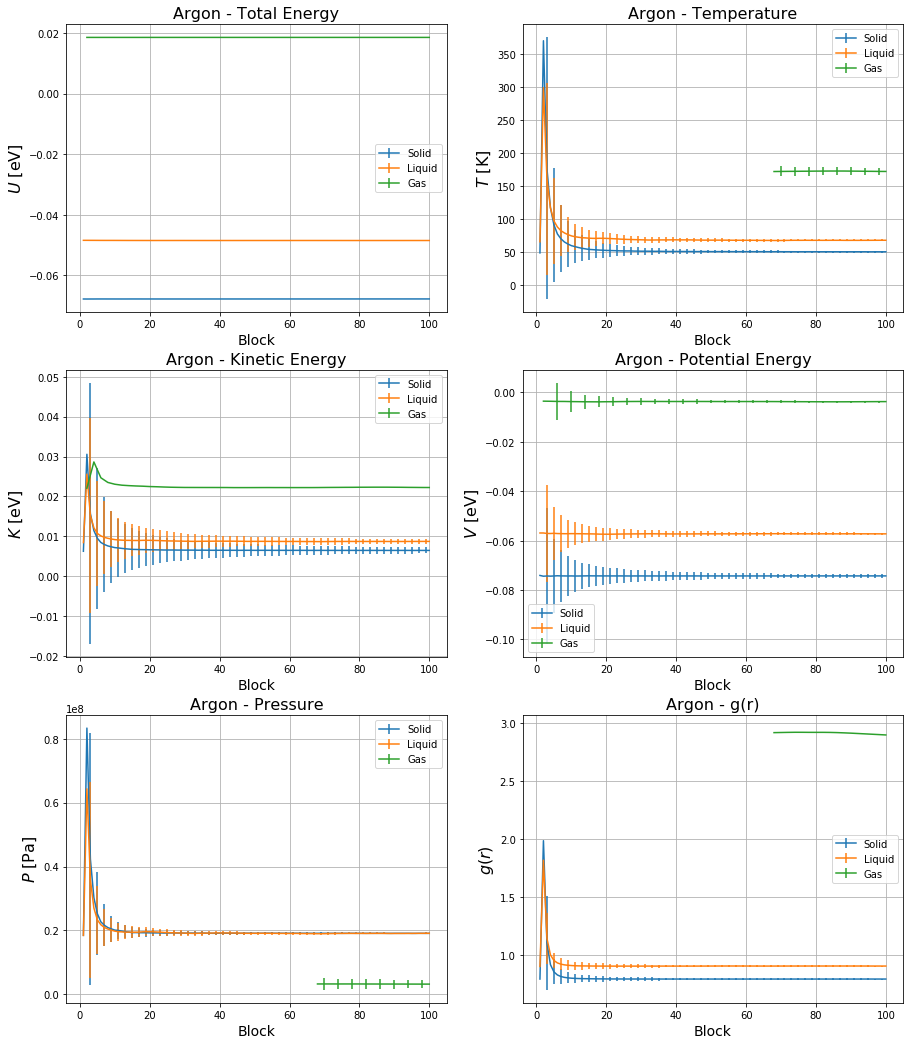

In [5]:
# ARGON

kb = 1.38065e-23
ev = 1.60217e-19

sigma = 0.34 # nm
e_kb = 120   # K
m = 39.948   # amu

fu = e_kb*kb/ev              # LJ to eV
fk = fu                      # LJ to K
fv = fu                      # LJ to eV
ft = e_kb                    # LJ to eV
fp = e_kb*kb/(sigma*1e-9)**3 # LJ to Pa

fig = plt.figure(figsize=[15,18])


# TOTAL ENERGY

step_s, u_solid, u_solid_err   = np.loadtxt("sim_data/solid/output.etot_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_l, u_liquid, u_liquid_err = np.loadtxt("sim_data/liquid/output.etot_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_g, u_gas, u_gas_err       = np.loadtxt("sim_data/gas/output.etot_ave.dat", delimiter= ",", unpack='true', skiprows=1)

step_g = 2*step_g

u_solid, u_solid_err = fu*u_solid, fu*u_solid_err
u_liquid, u_liquid_err = fu*u_liquid, fu*u_liquid_err
u_gas, u_gas_err = fu*u_gas, fu*u_gas_err

plt.subplot(3,2,1)
plt.title("Argon - Total Energy", fontsize = 16)

plt.errorbar(step_s, u_solid, yerr=u_solid_err, errorevery=2, label = "Solid")
plt.errorbar(step_l, u_liquid, yerr=u_liquid_err, errorevery=2, label = "Liquid")
plt.errorbar(step_g, u_gas, yerr=u_gas_err, errorevery=2, label = "Gas")

plt.ylabel('$U$ [eV]', fontsize = 16)
plt.xlabel('Block', fontsize = 14)
plt.legend()
plt.grid(True)

# TEMPERATURE

step_s, t_solid, t_solid_err   = np.loadtxt("sim_data/solid/output.temp_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_l, t_liquid, t_liquid_err = np.loadtxt("sim_data/liquid/output.temp_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_g, t_gas, t_gas_err       = np.loadtxt("sim_data/gas/output.temp_ave.dat", delimiter= ",", unpack='true', skiprows=1)

step_g = 2*step_g

t_solid, t_solid_err = ft*t_solid, ft*t_solid_err
t_liquid, t_liquid_err = ft*t_liquid, ft*t_liquid_err
t_gas, t_gas_err = ft*t_gas, ft*t_gas_err

plt.subplot(3,2,2)
plt.title("Argon - Temperature", fontsize = 16)

plt.errorbar(step_s, t_solid, yerr=t_solid_err, errorevery=2, label = "Solid")
plt.errorbar(step_l, t_liquid, yerr=t_liquid_err, errorevery=2, label = "Liquid")
plt.errorbar(step_g, t_gas, yerr=t_gas_err, errorevery=2, label = "Gas")

plt.ylabel('$T$ [K]', fontsize = 16)
plt.xlabel('Block', fontsize = 14)
plt.legend()
plt.grid(True)

# KINETIC ENERGY

step_s, k_solid, k_solid_err   = np.loadtxt("sim_data/solid/output.ekin_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_l, k_liquid, k_liquid_err = np.loadtxt("sim_data/liquid/output.ekin_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_g, k_gas, k_gas_err       = np.loadtxt("sim_data/gas/output.ekin_ave.dat", delimiter= ",", unpack='true', skiprows=1)

step_g = 2*step_g

plt.subplot(3,2,3)
plt.title("Argon - Kinetic Energy", fontsize = 16)

k_solid, k_solid_err = fk*k_solid, fk*k_solid_err
k_liquid, k_liquid_err = fk*k_liquid, fk*k_liquid_err
k_gas, k_gas_err = fk*k_gas, fk*k_gas_err

plt.errorbar(step_s, k_solid, yerr=k_solid_err, errorevery=2, label = "Solid")
plt.errorbar(step_l, k_liquid, yerr=k_liquid_err, errorevery=2, label = "Liquid")
plt.errorbar(step_g, k_gas, yerr=k_gas_err, errorevery=2, label = "Gas")

plt.ylabel('$K$ [eV]', fontsize = 16)
plt.xlabel('Block', fontsize = 14)
plt.grid(True)
plt.legend()

# POTENTIAL ENERGY

step_s, v_solid, v_solid_err   = np.loadtxt("sim_data/solid/output.epot_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_l, v_liquid, v_liquid_err = np.loadtxt("sim_data/liquid/output.epot_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_g, v_gas, v_gas_err       = np.loadtxt("sim_data/gas/output.epot_ave.dat", delimiter= ",", unpack='true', skiprows=1)

step_g = 2*step_g

v_solid, v_solid_err = fv*v_solid, fv*v_solid_err
v_liquid, v_liquid_err = fv*v_liquid, fv*v_liquid_err
v_gas, v_gas_err = fv*v_gas, fv*v_gas_err

plt.subplot(3,2,4)
plt.title("Argon - Potential Energy", fontsize = 16)

plt.errorbar(step_s, v_solid, yerr=v_solid_err, errorevery=2, label = "Solid")
plt.errorbar(step_l, v_liquid, yerr=v_liquid_err, errorevery=2, label = "Liquid")
plt.errorbar(step_g, v_gas, yerr=v_gas_err, errorevery=2, label = "Gas")

plt.ylabel('$V$ [eV]', fontsize = 16)
plt.xlabel('Block', fontsize = 14)
plt.grid(True)
plt.legend()


# PRESSURE

step_s, p_solid, p_solid_err   = np.loadtxt("sim_data/solid/output.pres_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_l, p_liquid, p_liquid_err = np.loadtxt("sim_data/liquid/output.pres_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_g, p_gas, p_gas_err       = np.loadtxt("sim_data/gas/output.pres_ave.dat", delimiter= ",", unpack='true', skiprows=1)

step_g = 2*step_g

p_solid, p_solid_err = fp*p_solid, fp*p_solid_err
p_liquid, p_liquid_err = fp*p_liquid, fp*p_liquid_err
p_gas, p_gas_err = fp*p_gas, fp*p_gas_err

plt.subplot(3,2,5)
plt.title("Argon - Pressure", fontsize = 16)

plt.errorbar(step_s, p_solid, yerr=p_solid_err, errorevery=2, label = "Solid")
plt.errorbar(step_l, p_liquid, yerr=p_liquid_err, errorevery=2, label = "Liquid")
plt.errorbar(step_g, p_gas, yerr=p_gas_err, errorevery=2, label = "Gas")

plt.ylabel('$P$ [Pa]', fontsize = 16)
plt.xlabel('Block', fontsize = 14)
plt.grid(True)
plt.legend()

# G(R)

step_s, g_solid, g_solid_err   = np.loadtxt("sim_data/solid/output.gofr_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_l, g_liquid, g_liquid_err = np.loadtxt("sim_data/liquid/output.gofr_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_g, g_gas, g_gas_err       = np.loadtxt("sim_data/gas/output.gofr_ave.dat", delimiter= ",", unpack='true', skiprows=1)

step_g = 2*step_g

plt.subplot(3,2,6)
plt.title("Argon - g(r)", fontsize = 16)

plt.errorbar(step_s, g_solid, yerr=g_solid_err, errorevery=2, label = "Solid")
plt.errorbar(step_l, g_liquid, yerr=g_liquid_err, errorevery=2, label = "Liquid")
plt.errorbar(step_g, g_gas, yerr=g_gas_err, errorevery=2, label = "Gas")

plt.ylabel('$g(r)$', fontsize = 16)
plt.xlabel('Block', fontsize = 14)
plt.grid(True)
plt.legend()

#------------------------------------------------

plt.show();

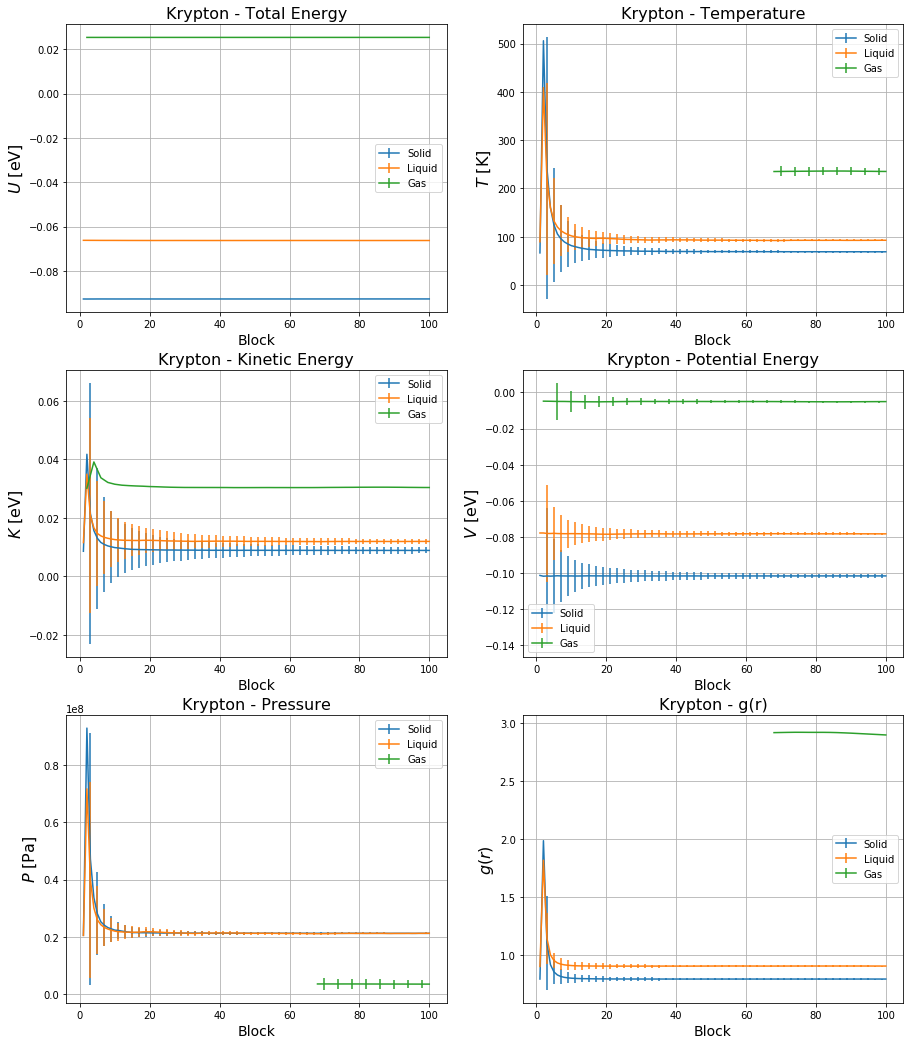

In [6]:
# KRYPTON

kb = 1.38065e-23
ev = 1.60217e-19

sigma = 0.364 # nm
e_kb = 164   # K
m = 83.798   # amu

fu = e_kb*kb/ev              # LJ to eV
fk = fu                      # LJ to K
fv = fu                      # LJ to eV
ft = e_kb                    # LJ to eV
fp = e_kb*kb/(sigma*1e-9)**3 # LJ to Pa

fig = plt.figure(figsize=[15,18])


# TOTAL ENERGY

step_s, u_solid, u_solid_err   = np.loadtxt("sim_data/solid/output.etot_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_l, u_liquid, u_liquid_err = np.loadtxt("sim_data/liquid/output.etot_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_g, u_gas, u_gas_err       = np.loadtxt("sim_data/gas/output.etot_ave.dat", delimiter= ",", unpack='true', skiprows=1)

step_g = 2*step_g

u_solid, u_solid_err = fu*u_solid, fu*u_solid_err
u_liquid, u_liquid_err = fu*u_liquid, fu*u_liquid_err
u_gas, u_gas_err = fu*u_gas, fu*u_gas_err

plt.subplot(3,2,1)
plt.title("Krypton - Total Energy", fontsize = 16)

plt.errorbar(step_s, u_solid, yerr=u_solid_err, errorevery=2, label = "Solid")
plt.errorbar(step_l, u_liquid, yerr=u_liquid_err, errorevery=2, label = "Liquid")
plt.errorbar(step_g, u_gas, yerr=u_gas_err, errorevery=2, label = "Gas")

plt.ylabel('$U$ [eV]', fontsize = 16)
plt.xlabel('Block', fontsize = 14)
plt.legend()
plt.grid(True)

# TEMPERATURE

step_s, t_solid, t_solid_err   = np.loadtxt("sim_data/solid/output.temp_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_l, t_liquid, t_liquid_err = np.loadtxt("sim_data/liquid/output.temp_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_g, t_gas, t_gas_err       = np.loadtxt("sim_data/gas/output.temp_ave.dat", delimiter= ",", unpack='true', skiprows=1)

step_g = 2*step_g

t_solid, t_solid_err = ft*t_solid, ft*t_solid_err
t_liquid, t_liquid_err = ft*t_liquid, ft*t_liquid_err
t_gas, t_gas_err = ft*t_gas, ft*t_gas_err

plt.subplot(3,2,2)
plt.title("Krypton - Temperature", fontsize = 16)

plt.errorbar(step_s, t_solid, yerr=t_solid_err, errorevery=2, label = "Solid")
plt.errorbar(step_l, t_liquid, yerr=t_liquid_err, errorevery=2, label = "Liquid")
plt.errorbar(step_g, t_gas, yerr=t_gas_err, errorevery=2, label = "Gas")

plt.ylabel('$T$ [K]', fontsize = 16)
plt.xlabel('Block', fontsize = 14)
plt.legend()
plt.grid(True)

# KINETIC ENERGY

step_s, k_solid, k_solid_err   = np.loadtxt("sim_data/solid/output.ekin_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_l, k_liquid, k_liquid_err = np.loadtxt("sim_data/liquid/output.ekin_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_g, k_gas, k_gas_err       = np.loadtxt("sim_data/gas/output.ekin_ave.dat", delimiter= ",", unpack='true', skiprows=1)

step_g = 2*step_g

plt.subplot(3,2,3)
plt.title("Krypton - Kinetic Energy", fontsize = 16)

k_solid, k_solid_err = fk*k_solid, fk*k_solid_err
k_liquid, k_liquid_err = fk*k_liquid, fk*k_liquid_err
k_gas, k_gas_err = fk*k_gas, fk*k_gas_err

plt.errorbar(step_s, k_solid, yerr=k_solid_err, errorevery=2, label = "Solid")
plt.errorbar(step_l, k_liquid, yerr=k_liquid_err, errorevery=2, label = "Liquid")
plt.errorbar(step_g, k_gas, yerr=k_gas_err, errorevery=2, label = "Gas")

plt.ylabel('$K$ [eV]', fontsize = 16)
plt.xlabel('Block', fontsize = 14)
plt.grid(True)
plt.legend()

# POTENTIAL ENERGY

step_s, v_solid, v_solid_err   = np.loadtxt("sim_data/solid/output.epot_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_l, v_liquid, v_liquid_err = np.loadtxt("sim_data/liquid/output.epot_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_g, v_gas, v_gas_err       = np.loadtxt("sim_data/gas/output.epot_ave.dat", delimiter= ",", unpack='true', skiprows=1)

step_g = 2*step_g

v_solid, v_solid_err = fv*v_solid, fv*v_solid_err
v_liquid, v_liquid_err = fv*v_liquid, fv*v_liquid_err
v_gas, v_gas_err = fv*v_gas, fv*v_gas_err

plt.subplot(3,2,4)
plt.title("Krypton - Potential Energy", fontsize = 16)

plt.errorbar(step_s, v_solid, yerr=v_solid_err, errorevery=2, label = "Solid")
plt.errorbar(step_l, v_liquid, yerr=v_liquid_err, errorevery=2, label = "Liquid")
plt.errorbar(step_g, v_gas, yerr=v_gas_err, errorevery=2, label = "Gas")

plt.ylabel('$V$ [eV]', fontsize = 16)
plt.xlabel('Block', fontsize = 14)
plt.grid(True)
plt.legend()


# PRESSURE

step_s, p_solid, p_solid_err   = np.loadtxt("sim_data/solid/output.pres_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_l, p_liquid, p_liquid_err = np.loadtxt("sim_data/liquid/output.pres_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_g, p_gas, p_gas_err       = np.loadtxt("sim_data/gas/output.pres_ave.dat", delimiter= ",", unpack='true', skiprows=1)

step_g = 2*step_g

p_solid, p_solid_err = fp*p_solid, fp*p_solid_err
p_liquid, p_liquid_err = fp*p_liquid, fp*p_liquid_err
p_gas, p_gas_err = fp*p_gas, fp*p_gas_err

plt.subplot(3,2,5)
plt.title("Krypton - Pressure", fontsize = 16)

plt.errorbar(step_s, p_solid, yerr=p_solid_err, errorevery=2, label = "Solid")
plt.errorbar(step_l, p_liquid, yerr=p_liquid_err, errorevery=2, label = "Liquid")
plt.errorbar(step_g, p_gas, yerr=p_gas_err, errorevery=2, label = "Gas")

plt.ylabel('$P$ [Pa]', fontsize = 16)
plt.xlabel('Block', fontsize = 14)
plt.grid(True)
plt.legend()

# G(R)

step_s, g_solid, g_solid_err   = np.loadtxt("sim_data/solid/output.gofr_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_l, g_liquid, g_liquid_err = np.loadtxt("sim_data/liquid/output.gofr_ave.dat", delimiter= ",", unpack='true', skiprows=1)
step_g, g_gas, g_gas_err       = np.loadtxt("sim_data/gas/output.gofr_ave.dat", delimiter= ",", unpack='true', skiprows=1)

step_g = 2*step_g

plt.subplot(3,2,6)
plt.title("Krypton - g(r)", fontsize = 16)

plt.errorbar(step_s, g_solid, yerr=g_solid_err, errorevery=2, label = "Solid")
plt.errorbar(step_l, g_liquid, yerr=g_liquid_err, errorevery=2, label = "Liquid")
plt.errorbar(step_g, g_gas, yerr=g_gas_err, errorevery=2, label = "Gas")

plt.ylabel('$g(r)$', fontsize = 16)
plt.xlabel('Block', fontsize = 14)
plt.grid(True)
plt.legend()

#------------------------------------------------

plt.show()